In [10]:
import numpy as np
import matplotlib.pyplot as plt

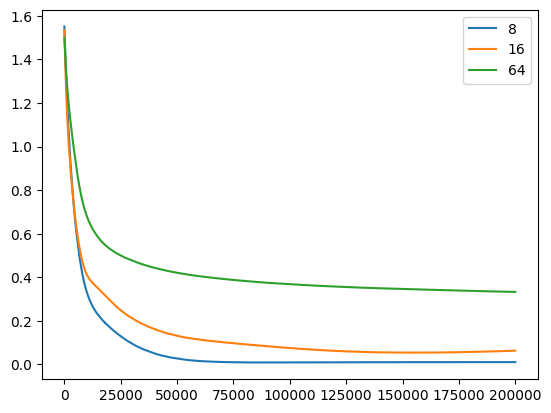

In [22]:
exp_id = "7cc8c"



num_agents = [8,16,64]

for num_agent in num_agents:
    
    res = np.load(f'results/{exp_id}/{num_agent}/total_error.npy')
    plt.plot(res,label=num_agent)
    #plt.yscale("log")
plt.legend()